# Introduction

The online store "Ice" sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation) and historical data on game sales are available in open sources. The goal of this project is to identify patterns that determine whether a game is successful or not. This will allow to detect promising projects and plan advertising campaigns.

The data goes back to 2016 and a campaign is being planned for 2017.

The dataset contains a "rating" column that stores the ESRB rating of each game. The Entertainment Software Rating Board evaluates the content of a game and assigns an age rating such as Teen or Adult.

# Data description

- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in millions of US dollars)
- EU_sales (European sales in millions of US dollars)
- JP_sales (Japan sales in millions of US dollars)
- Other_sales (Other countries sales in millions of US dollars)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

## Initialization and data loading

In [1]:
# Load libraries required for the project
import pandas as pd #Pandas library for dataset creation and manipulation
import numpy as np #Numpy library for scientific computing functions
import seaborn as sns #Seaborn library for box-and-whisker plot visualization
from matplotlib import pyplot as plt #Pyplot for graph visualization
from math import factorial #Factorial for factorial calculation
from scipy import stats as st #Scipy for statistical functions

In [2]:
# Load file with the dataframe and analyze its information
df_games = pd.read_csv('games.csv')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Data preparation

In [3]:
# Replace column names with lowercase
df_games.columns = [col.lower() for col in df_games.columns]
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
# MISSING VALUES
#Changing missing values ​​in name to "Unknown"
df_games['name'].fillna("Unknown", inplace=True)
#Changing missing values ​​in genre to "Unknown"
df_games['genre'].fillna("Unknown", inplace=True)
#Changing missing values ​​in year_of_release to 0
df_games['year_of_release'].fillna(0, inplace=True)
#Changing missing values ​​in rating to "Unknown"
df_games['rating'].fillna("Unknown", inplace=True)
#Changing "tbd" values ​​in user_score to NaN
df_games['user_score'].replace('tbd', np.NaN, inplace=True)

# CHECKING VALUES DUPLICATES
print("Duplicate values: ", df_games[df_games.duplicated()])

#Verifying filling of missing values
df_games.info()

Duplicate values:  Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#MODIFYING DATA TYPES

#YEAR OF RELEASE: float->int
#Verifying that the conversion does not affect the values ​​in the column
print(np.array_equal(df_games['year_of_release'], df_games['year_of_release'].astype('int')))
#Modifying data type
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

#USER_SCORE: object->float
#Modifying data type
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

#Verifying conversion
df_games.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [6]:
#Adding new column with total sales calculation
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

In [7]:
#Filling missing values in critic_score and user_score

#Calculating mean and median of both columns
critical_score_mean = df_games['critic_score'].mean()
critical_score_median = df_games['critic_score'].median()
user_score_mean = df_games['user_score'].mean()
user_score_median = df_games['user_score'].median()

print("Mean critical_score: ", critical_score_mean)
print("Median critical_score: ", critical_score_median)
print()
print("Mean user_score: ", user_score_mean)
print("Median user_score: ", user_score_median)

#Replacing missing values with average
df_games['critic_score'].fillna(critical_score_mean, inplace=True)
df_games['user_score'].fillna(user_score_mean, inplace=True)

#Verifying
df_games.info()

Mean critical_score:  68.96767850559173
Median critical_score:  71.0

Mean user_score:  7.125046113306982
Median user_score:  7.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


<h3>Data Preparation Conclusions</h3>

**Missing Values**<br>
Column names were changed to lowercase.
Missing values in some columns were changed as follows:
- name: Replaced with the word "Unknown".
- genre: Replaced with the word "Unknown".
- year_of_release: Replaced with 0.
- rating: Replaced with the word "Unknown".
- "tbd" values in the user_score column were changed to NaN (i.e. missing values).<br>
- Missing values in the critical_score and user_score columns were not changed due to the high number of missing values.

**Duplicate Values**<br>
No duplicate values were found in the dataframe.

**Data Types**<br>
Changed year_of_release data types to int and user_score to float, respectively.

**Feature Engineering**<br>
Added a new column "total_sales" with the sum of sales across all regions for each game.

## Analysis

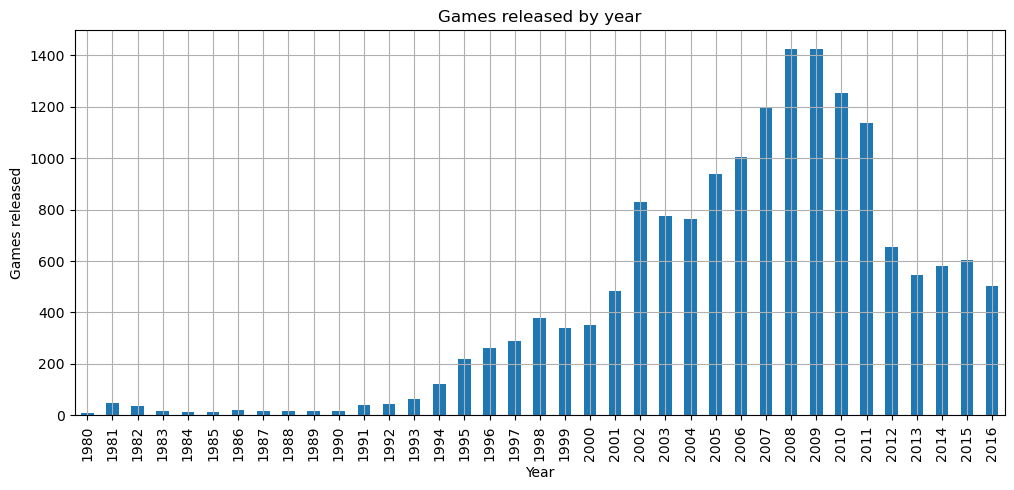

In [8]:
# *** Showing games released by year ***
#Grouping games by year
games_per_year = df_games.groupby('year_of_release')['name'].count()
#Filtering to remove those without a release year (0), which are in the first row of the grouping
games_per_year = games_per_year.loc[1:]
#Creating graph
games_per_year.plot(kind='bar',
                    xlabel="Year",
                    ylabel='Games released',
                    figsize=[12, 5],
                    title='Games released by year',
                    grid=True)
plt.show()

**Remarks**<br>
There is a notable increase in the release of games between 2006 and 2011, and from 2012 onwards there is a considerable reduction that continues for the rest of the years.

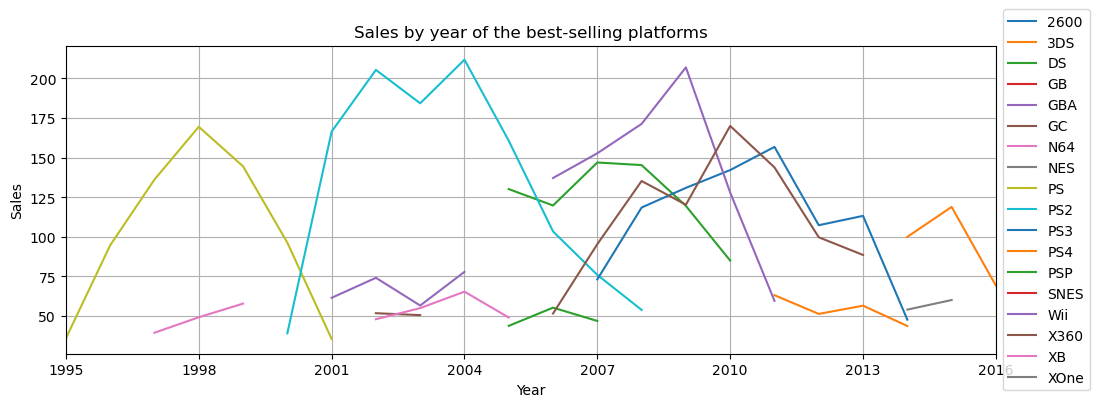

In [9]:
# *** Platform sales over time ***
#Grouping by platform and release year with the sum of total sales
sales_per_plat_year = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum()
#Sorting from highest to lowest
sales_per_plat_year = sales_per_plat_year.sort_values(ascending=False)
#Trimming to 80 records to get only the platforms with the highest sales
most_sold_platforms = sales_per_plat_year[:80]
#Converting the grouped Series to Dataframe
most_sold_platforms = most_sold_platforms.to_frame()
#Resetting indexes
most_sold_platforms.reset_index(inplace=True)

#Creating pivot table
pivot_spp = most_sold_platforms.pivot_table(index='year_of_release',
                                            columns='platform',
                                            values='total_sales',
                                            aggfunc='sum'
                                            )
#Graphing
ax = pivot_spp.plot(xlabel="Year",
                    ylabel='Sales',
                    xlim=[1995, 2016],
                    figsize=[12, 4],
                    title='Sales by year of the best-selling platforms',
                    grid=True)

# Adjusting the format of the ticks on the x-axis to be integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

#Adjusting legend to be outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Portables**<br>
Portable consoles maintain a low level of sales compared to stationary ones, the most popular of these being the GBA, with a life span from 2001 to 2004 and being the only one that managed to exceed 75 million in sales by 2004

**Nintendo**<br>
Its old console, the N64, had a life span of 3 years, ceasing to sell in 1999, and it took almost 10 years (until 2006) to launch a new console, the Wii, which despite being the second most sold console according to records, exceeding 200 million in 2009, has a very considerable drop in sales until it disappeared in 2011.

**Play Station**<br>
All PS consoles maintain a certain consistency in their time of appearance/disappearance, the PS clearly dominating the market from 1995 to 2001 (6 years), just before sales ended, in 2000 the PS2 was released, which kept pace with its predecessor, reaching more than 200 million in sales in 2002 and 2004 and being the best-selling console according to records, with a lifespan of 8 years. The PS3 was also released before sales of the PS2 ended, and also maintained a similar lifespan to the previous 2, reaching similar sales to the PS and with a lifespan of 7 years. Finally, the PS4 appeared in the same year that sales of the PS3 ended (2014), and is projected as a console to keep in mind in future years, maintaining sales since then until the present 2016.

**Xbox**<br>
There are not many records for Xbox, since it does not have as long a history as the other consoles, however its current console, the Xbox One, has maintained sales since its launch in 2014.

In [10]:
#Converting the previously obtained Series (Grouped by platform and year of release) to Dataframe
sales_per_plat_year = sales_per_plat_year.to_frame()
#Resetting indexes
sales_per_plat_year.reset_index(inplace=True)

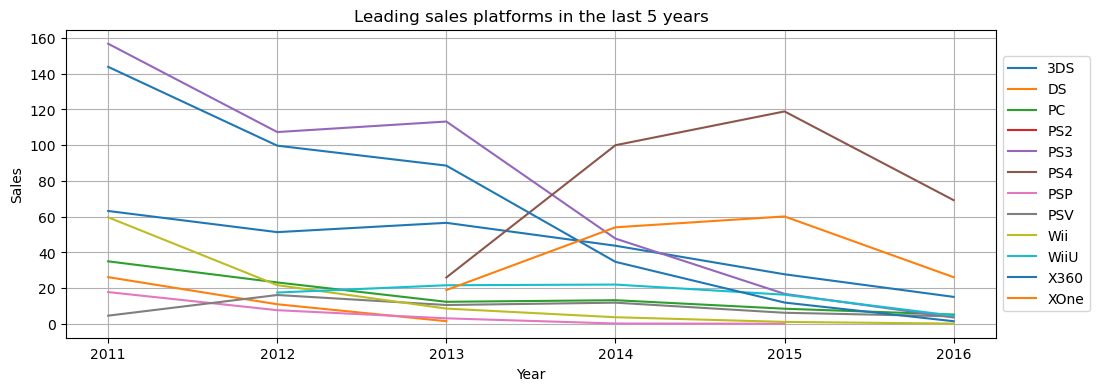

In [11]:
# *** Creating a model for next year (2017) ***
#Filtering to take only platforms with sales from 2011 (Last 5 years)
lead_platforms_last5y = sales_per_plat_year.query("year_of_release > 2010")
#Resetting indexes
lead_platforms_last5y.reset_index(inplace=True)

#Creating pivot table
pivot_lp = lead_platforms_last5y.pivot_table(index='year_of_release',
                                             columns='platform',
                                             values='total_sales',
                                             aggfunc='sum'
                                             )

#Plotting
ax = pivot_lp.plot(xlabel="Year",
                   ylabel='Sales',
                   figsize=[12, 4],
                   title='Leading sales platforms in the last 5 years',
                   grid=True)

#Adjusting legend to be outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Remarks**<br>
All platforms seem to have seen a decline in 2016 compared to 2015, however those that remain at a higher level of profitability are the PS4 and the XOne, what is surprising about the graph is the 3DS console that remains in third place in sales, and the Nintendo WiiU in 4th place.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


<Axes: >

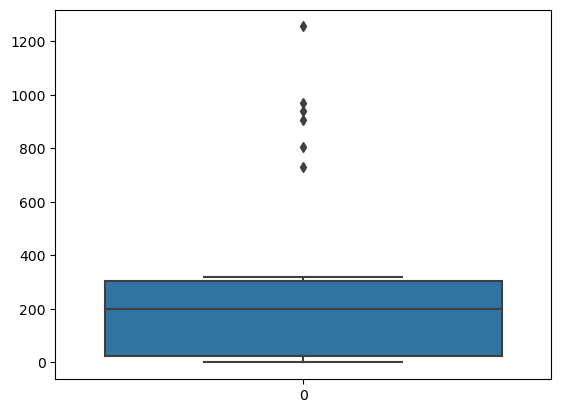

In [12]:
# *** Boxplot with sales distribution by platform ***
#Grouping by platform and total sum of sales
sales_per_platform = df_games.groupby('platform')['total_sales'].sum()
#Printing grouping
print(sales_per_platform.sort_values(ascending=False))
#Creating boxplot
sns.boxplot(sales_per_platform)

**Remarks**<br>
The lowest sales numbers apply to almost all of the older consoles on the list.
The median in-box sales hover around $200 million, with several of the consoles having total sales close to this number, a number of which are consoles that peaked in the early 2000s, while the out-of-box data for the top selling platforms are those that peaked between 2004 and 2011 according to the chart above, suggesting that the next generation consoles, despite having solid sales, have not reached the levels once achieved by previous generation consoles such as Sony's PS2 and PS3 and Microsoft's Xbox360.

Correlation between critic score and sales:  0.3674538695723083
Correlation between user score and sales:  0.21147951638016332


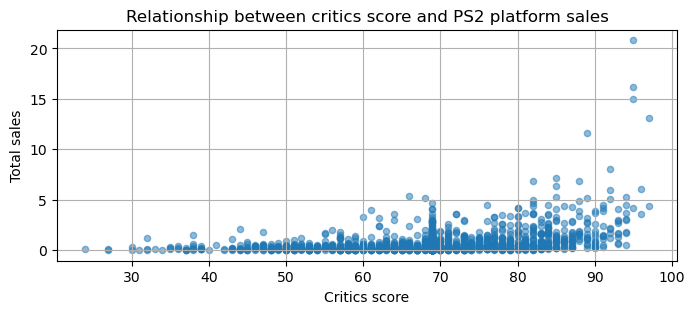

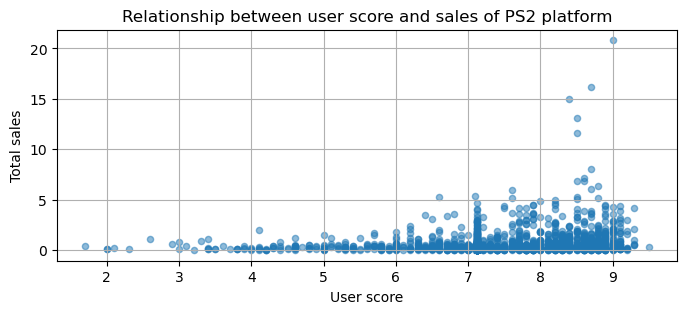

In [13]:
# *** Evaluating correlation between reviews and sales of the PS2 platform ***
#Filtering by PS2 platform games
ps2 = df_games[df_games['platform'] == 'PS2']

#Graficando
ps2.plot(x='critic_score', xlabel='Critics score', 
         y='total_sales', ylabel='Total sales',
         figsize=[8, 3],
         kind='scatter', 
         alpha=0.5, 
         grid=True, 
         title='Relationship between critics score and PS2 platform sales')

ps2.plot(x='user_score', xlabel='User score',
         y='total_sales', ylabel='Total sales',
         figsize=[8, 3],
         kind='scatter',
         alpha=0.5,
         grid=True,
         title='Relationship between user score and sales of PS2 platform')

#Calculating correlation coefficients
print("Correlation between critic score and sales: ", ps2['critic_score'].corr(ps2['total_sales']))
print("Correlation between user score and sales: ", ps2['user_score'].corr(ps2['total_sales']))

**Remarks**<br>
It is quite clear from the graphs that there is a positive correlation in both cases, both the user and critic ratings have a direct influence on the number of sales of the games, with the latter having the greatest influence with a correlation of 0.39.

name
Need for Speed: Most Wanted    12
Madden NFL 07                   9
Name: count, dtype: int64


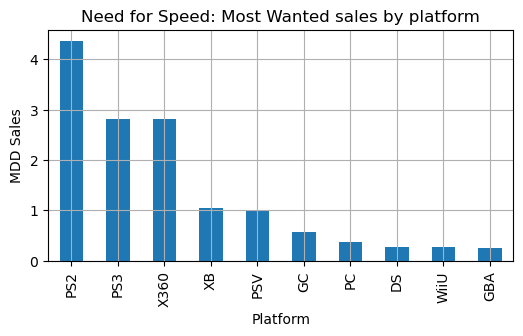

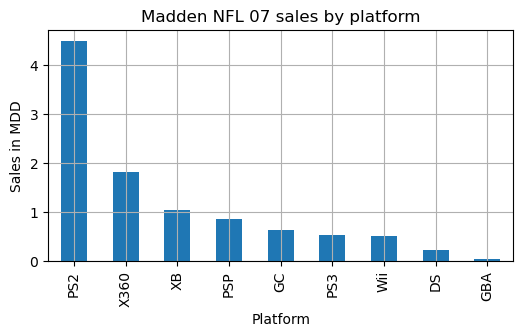

In [14]:
# *** Comparing sales of the same games on different platforms ***

#Getting the 2 most repeated games, i.e. found on more platforms
most_dif_platforms = df_games['name'].value_counts().head(2)
#Showing the 2 games
print(most_dif_platforms)

#Filtering and grouping by sales of the 1st game
NFS_dif_platforms = df_games.query("name == 'Need for Speed: Most Wanted'")
NFS_sales_pplat = NFS_dif_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
#Graphing
NFS_sales_pplat.plot(kind='bar',
                     xlabel="Platform",
                     ylabel='MDD Sales', 
                     figsize=[6, 3],
                     title='Need for Speed: Most Wanted sales by platform',
                     grid=True)
plt.show()

#Filtering and grouping by sales of the 2nd game
NFL_dif_platforms = df_games.query("name == 'Madden NFL 07'")
NFL_sales_pplat = NFL_dif_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
#Graphing
NFL_sales_pplat.plot(kind='bar',
                     xlabel="Platform",
                     ylabel='Sales in MDD',
                     figsize=[6, 3],
                     title='Madden NFL 07 sales by platform',
                     grid=True)
plt.show()

**Remarks**<br>
These two games in particular were distributed on the same platforms, in both cases the highest sales were on the PS2 platform, however the rest of the platforms had variances in sales, for example, for Need for Speed, on the PS3 platform it reached more than 2.5 million in sales, far surpassing the XB which barely surpassed one million. But in the Madden NFL game, sales on the XB were almost double those on the PS3.

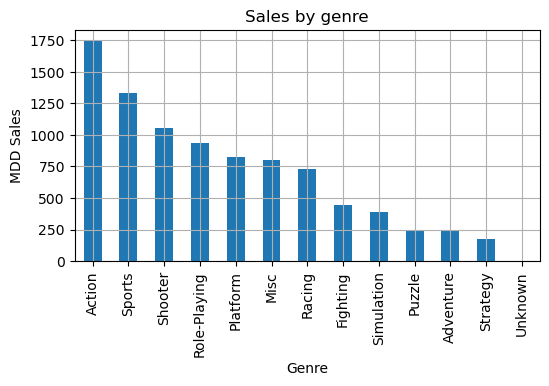

The 15 most popular games sold :
                           name         genre  total_sales
0                    Wii Sports        Sports        82.54
1             Super Mario Bros.      Platform        40.24
2                Mario Kart Wii        Racing        35.52
3             Wii Sports Resort        Sports        32.77
4      Pokemon Red/Pokemon Blue  Role-Playing        31.38
5                        Tetris        Puzzle        30.26
6         New Super Mario Bros.      Platform        29.80
7                      Wii Play          Misc        28.91
8     New Super Mario Bros. Wii      Platform        28.32
9                     Duck Hunt       Shooter        28.31
10                   Nintendogs    Simulation        24.67
11                Mario Kart DS        Racing        23.21
12  Pokemon Gold/Pokemon Silver  Role-Playing        23.09
13                      Wii Fit        Sports        22.70
14           Kinect Adventures!          Misc        21.82


In [15]:
# *** Evaluating profitability of games by genre ***
#Grouping by genre and sorting from highest to lowest
games_per_genre = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
#Graphing
games_per_genre.plot(kind='bar',
                     y = "total_sales",
                     xlabel="Genre",
                     ylabel='MDD Sales',
                     figsize=[6, 3],
                     title='Sales by genre',
                     grid=True)
plt.show()

#getting the best-selling games to see if it is possible to generalize by genre
most_sales = df_games.sort_values(by='total_sales', ascending=False)
print("The 15 most popular games sold :")
print(most_sales.loc[:,['name','genre','total_sales']].head(15))

**Remarks**<br>
The most profitable game genres and the only ones that exceed 1000 million dollars in sales are: Action, Sports and Shooter.

I wouldn't say that we can generalize that the most popular games will always belong to these categories, since 11 of the 15 best-selling games do not belong to these genres, in fact none of them belong to the best-selling genre (Action).

## Profile of each region

In [16]:
# *** Creating NA Region Profile ***
#Grouping by Top 5 Platforms
NA_sales_per_platform = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
NA_five_platforms = NA_sales_per_platform.head(5)
#Grouping by Top 5 Genres
NA_sales_per_genre = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
NA_five_genres = NA_sales_per_genre.head(5)
#Grouping by ESRB Rating
df_games_rating = df_games.query("rating != 'Unknown'") #Filtering to not include unknown ratings
NA_sales_per_ESRB = df_games_rating.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
NA_five_ESRB = NA_sales_per_ESRB.head(5)

# *** Creating EU Region Profile ***
#Grouping by the 5 main platforms
EU_sales_per_platform = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
EU_five_platforms = EU_sales_per_platform.head(5)
#Group by the 5 main genres
EU_sales_per_genre = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
EU_five_genres = EU_sales_per_genre.head(5)
#Group by ESRB rating
EU_sales_per_ESRB = df_games_rating.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
EU_five_ESRB = EU_sales_per_ESRB.head(5)

# *** Creating JP Region Profile ***
#Grouping by Top 5 Platforms
JP_sales_per_platform = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
JP_five_platforms = JP_sales_per_platform.head(5)
#Grouping by Top 5 Genres
JP_sales_per_genre = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
JP_five_genres = JP_sales_per_genre.head(5)
#ESRB Rating Grouping
JP_sales_per_ESRB = df_games_rating.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
JP_five_ESRB = JP_sales_per_ESRB.head(5)

In [17]:
print("Sales by platform in North America: ")
print(NA_five_platforms)
print()
print("Sales by platform in Europe: ")
print(EU_five_platforms)
print()
print("Sales by platform in Japan: ")
print(JP_five_platforms)

Sales by platform in North America: 
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Sales by platform in Europe: 
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Sales by platform in Japan: 
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


**Remarks**<br>
- In North America and Europe, the top 5 platforms almost completely coincide, in terms of order, in North America the sales leader is the X360, while in Europe they seem to prefer the PS consoles, both the 2 and the 3 are the best sellers and the PS is at the top, unlike North America where the 5th place is occupied by the DS.
- The Japanese region shows a clear difference with respect to the other two regions, the X360 does not appear in the top 5 (surely due to the preference of the Japanese for national products), in addition to the fact that we can see older consoles such as the SNES and the PS in the ranking.

In [18]:
print("Sales by genre in North America: ")
print(NA_five_genres)
print()
print("Sales by genre in Europe: ")
print(EU_five_genres)
print()
print("Sales by genre in the Japan region: ")
print(JP_five_genres)

Sales by genre in North America: 
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Sales by genre in Europe: 
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Sales by genre in the Japan region: 
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


**Remarks**<br>
- As with the platform groupings, North America and Europe share the top 5 for game genres in almost the same order, the only difference being that 4th place is occupied by platform games in North America, while racing games are preferred in Europe.
- In Japan, sales by genre also differ, with RPGs taking 1st place, with a considerable lead over the other genres.
- Action and Sports are clearly the favourite genres, ranking high in all three regions.

In [19]:
print("Sales by ESRB rating in North America: ")
print(NA_five_ESRB)
print()
print("Sales by ESRB rating in Europe: ")
print(EU_five_ESRB)
print()
print("Sales by ESRB rating in Japan: ")
print(JP_five_ESRB)

Sales by ESRB rating in North America: 
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

Sales by ESRB rating in Europe: 
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

Sales by ESRB rating in Japan: 
rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


**Remarks**<br>
- There is no impact on sales due to ESRB ratings, the three regions share practically the same ratings as sales leaders, with E, T and M being the top 3 in all 3 cases.

## Hypothesis testing

In [20]:
# *** Testing Hypothesis ***
"""
    H0: Average user ratings for Xbox One and PC platforms are the same
    H1: Average user ratings for Xbox One and PC platforms differ
"""

#Filtering
df_games_uscore_nonan = df_games[~df_games['user_score'].isna()] #Filtering to not include unrated lines
user_xone = df_games_uscore_nonan.query("platform == 'XOne'") #Filtering by XOne platform
user_pc = df_games_uscore_nonan.query("platform == 'PC'") #Filtering by PC platform

#Defining alpha and applying t-test
alpha = 0.05
results = st. ttest_ind(user_xone['user_score'], user_pc['user_score'])

#Extracting p-value
print('p-value: ', results.pvalue)

if results.pvalue < alpha: # compare p-value to threshold
    print("We reject the null hypothesis, average scores do differ between XOne and PC users.")
else:
    print("We cannot reject the null hypothesis, average scores do not differ between XOne and PC users.")

p-value:  3.329648256313532e-05
We reject the null hypothesis, average scores do differ between XOne and PC users.


In [21]:
# *** Testing hypothesis ***
"""
    H0: Average user ratings for Action and Sports genres are the same.
    H1: Average user ratings for Action and Sports genres differ.
"""

#Filtering
user_action = df_games_uscore_nonan.query("genre == 'Action'") #Filtering by Action genre
user_sports = df_games_uscore_nonan.query("genre == 'Sports'") #Filtering by Sports genre

#Defining alpha and applying t-test
alpha = 0.05
results = st.ttest_ind(user_action['user_score'], user_sports['user_score'])

#Extracting p-value
print('p-value: ', results.pvalue)

if results.pvalue < alpha: # compare p-value to threshold
    print("We reject the null hypothesis, the average ratings do differ between the Action and Sports genres.")
else:
    print("We cannot reject the null hypothesis, the average ratings do not differ between the Action and Sports genres.")

p-value:  0.18372589312608184
We cannot reject the null hypothesis, the average ratings do not differ between the Action and Sports genres.


**Remarks**<br>
- In both hypothesis tests, the null hypothesis was defined as the equality in the average ratings for two different platforms and for two different genders respectively, the alternative hypothesis was defined as the difference between these same average ratings.
- t tests were used to test the hypothesis, since in both cases the test requires an evaluation of the difference statistic resulting from the comparison of the means of two samples of the population.

# Conclusiones

The data analysis conducted for the online store "Ice" has identified key patterns that can influence the selection of successful games for future advertising campaigns.

In terms of market trends, there has been a decline in the number of game releases since 2012, suggesting a possible shift in developer strategies or a stronger concentration of titles on specific platforms. Regarding the most profitable platforms, PlayStation 4 (PS4) and Xbox One (XOne) stand out in recent sales, indicating that games targeting these consoles have a higher likelihood of success. However, the Nintendo 3DS also maintains a competitive position, particularly in certain markets.

The correlation analysis shows that both critic and user ratings have a positive relationship with game sales, with critic reviews having a greater impact. This highlights the importance of considering expert reviews when selecting which titles to promote.

As for the most profitable game genres, Action, Sports, and Shooter games lead global sales. However, the best-selling titles historically cover a wide range of categories, suggesting that a game's success is not solely dependent on its genre. Additionally, player preferences vary by region: while Action and Sports games dominate in North America and Europe, Role-Playing games are the most popular in Japan.

Furthermore, hypothesis testing indicates that the average user ratings for Xbox One and PC games are significantly different, possibly due to variations in gaming experiences between these platforms. On the other hand, no significant differences were found between the ratings of Action and Sports genres, suggesting that both types of games generate similar user satisfaction.

In conclusion, to maximize the impact of the 2017 advertising campaign, it is recommended to focus on games for the most profitable platforms (PS4 and XOne), prioritizing those with high critic ratings. Additionally, campaigns should be tailored to regional preferences, emphasizing Role-Playing games in Japan and Action and Sports games in North America and Europe.